In [ ]:
# Завантаження потрібних бібліотек
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Імпорт відповідних бібліотек
import os
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image as IPyImage

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# === 1. Налаштування ===
# Параметри
HOME = os.getcwd() # Домашня директорія
API_KEY = "US6GFXKmmIauPoD8GLi5" # API-ключ
WORKSPACE_NAME = "dekkan-neural-network-workspace" # Назва робочої області (Dekkan neural network workspace)
PROJECT_NAME = "cats_detection-yjccj" # Ім'я проєкту (Cats_detection)
DATASET_VERSION = 1 # Версія датасету
DATA_FORMAT = "yolov11" # Формат даних датасету
MODEL_PATH = f"{HOME}/models/yolo11m.pt" # Шлях до завантаженої моделі
TRAIN_EPOCHS = 50 # Кількість епох
IMG_SIZE = 640 # Розмір зображень

In [ ]:
# === 2. Завантаження датасету ===
def download_dataset():
    print("Завантаження датасету...")
    rf = Roboflow(api_key=API_KEY)
    project = rf.workspace(WORKSPACE_NAME).project(PROJECT_NAME)
    version = project.version(DATASET_VERSION)
    dataset = version.download(DATA_FORMAT)
    print(f"Датасет завантажено до: {dataset.location}")
    return dataset

In [ ]:
# === 3. Тренування моделі ===
def train_model(dataset):
    print("Тренування моделі...")
    model = YOLO(MODEL_PATH)  # Завантаження предтренованої моделі

    print("Пристрій, що використовується:", model.device)
    model.train(
        data = f"{dataset.location}/data.yaml",
        epochs = TRAIN_EPOCHS,
        imgsz = IMG_SIZE,
        plots = True,
        save = True,
        project = 'runs/detect',  # Стандартний шлях
        name = 'train_result',  # Ім'я підкаталогу
        batch = 8,
    )
    print("Тренування завершено.")
    return model

In [ ]:
# === 4. Основний блок ===
if __name__ == "__main__":
    # Завантаження датасету
    dataset = download_dataset()

    # Тренування моделі
    model = train_model(dataset)

    # Отримання шляху до останньої тренувальної сесії
    runs_path = "runs/detect"
    latest_run = max([os.path.join(runs_path, d) for d in os.listdir(runs_path)], key=os.path.getmtime)
    print(f"Останній запуск збережено в: {latest_run}")

    print("Все завершено успішно.")

Завантаження датасету...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cats_detection-1 in yolov11:: 100%|██████████| 33458/33458 [00:04<00:00, 7031.25it/s]


Датасет завантажено до: /content/Cats_detection-1
Тренування моделі...


100%|██████████| 38.8M/38.8M [00:00<00:00, 215MB/s]


Пристрій, що використовується: cpu
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/models/yolo11m.pt, data=/content/Cats_detection-1/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=train_result, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

100%|██████████| 755k/755k [00:00<00:00, 101MB/s]


Overriding model.yaml nc=80 with nc=24

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 289MB/s]


AMP: checks passed ✅


train: Scanning /content/Cats_detection-1/train/labels... 14634 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14634/14634 [00:10<00:00, 1454.35it/s]


train: New cache created: /content/Cats_detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Cats_detection-1/valid/labels... 1393 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1393/1393 [00:01<00:00, 1276.10it/s]

val: New cache created: /content/Cats_detection-1/valid/labels.cache


Plotting labels to runs/detect/train_result/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train_result
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.77G     0.6972      2.494      1.379          6        640: 100%|██████████| 1830/1830 [03:55<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:09<00:00,  9.27it/s]


                   all       1393       1440      0.507      0.511      0.491      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.65G     0.7129      1.955      1.369          4        640: 100%|██████████| 1830/1830 [03:39<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.20it/s]

                   all       1393       1440      0.429      0.566      0.477      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.66G     0.8068       2.06      1.437          4        640: 100%|██████████| 1830/1830 [03:34<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08<00:00, 10.99it/s]

                   all       1393       1440      0.362      0.449      0.363      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.66G      0.831      2.103      1.449          8        640: 100%|██████████| 1830/1830 [03:35<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.03it/s]

                   all       1393       1440      0.348      0.545      0.437      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.63G     0.7667      1.977      1.396          6        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.24it/s]

                   all       1393       1440      0.408      0.601      0.526      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.64G      0.729      1.868      1.368          8        640: 100%|██████████| 1830/1830 [03:32<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.11it/s]

                   all       1393       1440      0.502      0.595      0.577      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.64G     0.6944       1.79      1.339          7        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.32it/s]

                   all       1393       1440      0.627      0.608      0.641      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.64G      0.677      1.734      1.325          4        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.15it/s]

                   all       1393       1440      0.596      0.682      0.697      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.61G     0.6504      1.666      1.304          7        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.24it/s]

                   all       1393       1440      0.626      0.668      0.691      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.66G     0.6373      1.617      1.294          5        640: 100%|██████████| 1830/1830 [03:32<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.22it/s]

                   all       1393       1440      0.643      0.702       0.74      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.65G       0.62      1.578      1.283          4        640: 100%|██████████| 1830/1830 [03:32<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.23it/s]

                   all       1393       1440      0.647      0.752      0.763      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.66G      0.615      1.531      1.277          5        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.19it/s]

                   all       1393       1440      0.678      0.753      0.766      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.61G     0.6004      1.499      1.265          7        640: 100%|██████████| 1830/1830 [03:32<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.23it/s]

                   all       1393       1440      0.698      0.736      0.785      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.63G     0.5885      1.459      1.258          6        640: 100%|██████████| 1830/1830 [03:32<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.22it/s]

                   all       1393       1440      0.714      0.791      0.814      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.66G     0.5856      1.432      1.254          7        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.36it/s]

                   all       1393       1440      0.739      0.766      0.817       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.66G     0.5729        1.4      1.244          5        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.32it/s]

                   all       1393       1440      0.734       0.78      0.824      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.63G     0.5601      1.373      1.236          3        640: 100%|██████████| 1830/1830 [03:34<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.29it/s]

                   all       1393       1440       0.78      0.808      0.856      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.66G     0.5583      1.334      1.231          5        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.25it/s]

                   all       1393       1440      0.816      0.768      0.857      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.64G     0.5472      1.308      1.222          7        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.29it/s]

                   all       1393       1440       0.82      0.793       0.87      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.66G     0.5483      1.292       1.22          6        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.24it/s]

                   all       1393       1440      0.792      0.818       0.87      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.62G      0.536      1.266      1.213          8        640: 100%|██████████| 1830/1830 [03:32<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.34it/s]

                   all       1393       1440       0.85      0.796      0.879      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.67G     0.5337      1.243      1.215          6        640: 100%|██████████| 1830/1830 [03:32<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.20it/s]

                   all       1393       1440      0.835      0.831      0.882      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.64G     0.5268      1.242       1.21          6        640: 100%|██████████| 1830/1830 [03:32<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.26it/s]

                   all       1393       1440      0.842      0.816      0.889      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.66G     0.5174      1.201      1.204          6        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.29it/s]

                   all       1393       1440      0.828      0.849      0.896      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.61G      0.511      1.191      1.197          5        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.50it/s]

                   all       1393       1440      0.833      0.846      0.902      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.67G     0.5061      1.167      1.192          5        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.21it/s]

                   all       1393       1440      0.836      0.835        0.9      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.66G     0.5024      1.139      1.189          4        640: 100%|██████████| 1830/1830 [03:32<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.24it/s]

                   all       1393       1440      0.869      0.839      0.913      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.65G     0.4974      1.126      1.184          7        640: 100%|██████████| 1830/1830 [03:32<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.30it/s]

                   all       1393       1440      0.866      0.844      0.913      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.61G      0.489       1.11       1.18          3        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.35it/s]

                   all       1393       1440      0.839      0.855      0.909      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.67G     0.4892       1.09      1.181          7        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.25it/s]

                   all       1393       1440      0.864      0.866       0.92      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.64G     0.4811      1.078      1.175          4        640: 100%|██████████| 1830/1830 [03:33<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.36it/s]

                   all       1393       1440      0.868      0.858       0.92      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.67G     0.4801      1.059      1.173          5        640: 100%|██████████| 1830/1830 [03:39<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.09it/s]

                   all       1393       1440      0.862      0.872      0.921      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.62G     0.4693      1.049      1.167          6        640: 100%|██████████| 1830/1830 [03:40<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.14it/s]

                   all       1393       1440      0.871      0.862      0.921      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.66G     0.4648      1.027      1.161          8        640: 100%|██████████| 1830/1830 [03:41<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08<00:00, 11.00it/s]

                   all       1393       1440      0.865       0.86      0.923      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.64G     0.4596      1.001      1.158          8        640: 100%|██████████| 1830/1830 [03:41<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.11it/s]

                   all       1393       1440      0.894      0.863       0.93      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.65G     0.4544     0.9848      1.155          7        640: 100%|██████████| 1830/1830 [03:41<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.15it/s]

                   all       1393       1440      0.885      0.855      0.929      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.61G     0.4521     0.9747      1.153          4        640: 100%|██████████| 1830/1830 [03:40<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.22it/s]

                   all       1393       1440      0.899      0.864      0.933      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.64G     0.4486     0.9574      1.149          5        640: 100%|██████████| 1830/1830 [03:41<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.02it/s]

                   all       1393       1440      0.889      0.861      0.933      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.67G     0.4441     0.9423      1.148          6        640: 100%|██████████| 1830/1830 [03:41<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08<00:00, 10.96it/s]

                   all       1393       1440      0.879      0.869      0.929      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.66G     0.4381      0.938      1.144          6        640: 100%|██████████| 1830/1830 [03:41<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.21it/s]

                   all       1393       1440      0.885      0.871      0.931      0.857


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.61G     0.3174     0.4155      1.128          2        640: 100%|██████████| 1830/1830 [03:42<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.07it/s]

                   all       1393       1440      0.894      0.853      0.931      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.64G     0.3034     0.3741      1.112          2        640: 100%|██████████| 1830/1830 [03:42<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08<00:00, 10.99it/s]

                   all       1393       1440      0.873      0.878      0.934      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.66G     0.2961     0.3515      1.104          2        640: 100%|██████████| 1830/1830 [03:41<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.09it/s]

                   all       1393       1440      0.873      0.893      0.934      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.64G     0.2884     0.3304      1.092          2        640: 100%|██████████| 1830/1830 [03:42<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.07it/s]

                   all       1393       1440      0.896      0.867      0.934      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.63G     0.2816     0.3072      1.088          2        640: 100%|██████████| 1830/1830 [03:44<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08<00:00, 10.96it/s]

                   all       1393       1440      0.858      0.902      0.933      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.64G     0.2734     0.2909      1.078          2        640: 100%|██████████| 1830/1830 [03:43<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.10it/s]

                   all       1393       1440      0.867      0.903      0.932      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.64G     0.2646     0.2795      1.068          2        640: 100%|██████████| 1830/1830 [03:42<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.19it/s]

                   all       1393       1440      0.886       0.88       0.93      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.64G     0.2579     0.2611      1.066          2        640: 100%|██████████| 1830/1830 [03:41<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.12it/s]

                   all       1393       1440      0.886      0.886      0.932      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.63G     0.2532     0.2446      1.059          2        640: 100%|██████████| 1830/1830 [03:41<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.03it/s]

                   all       1393       1440      0.864      0.901      0.931      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.64G     0.2467     0.2323      1.055          2        640: 100%|██████████| 1830/1830 [03:41<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07<00:00, 11.07it/s]

                   all       1393       1440       0.89      0.879      0.931      0.873



50 epochs completed in 3.143 hours.
Optimizer stripped from runs/detect/train_result/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train_result/weights/best.pt, 40.5MB

Validating runs/detect/train_result/weights/best.pt...
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11m summary (fused): 303 layers, 20,048,536 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08<00:00, 10.73it/s]


                   all       1393       1440      0.857      0.904      0.933      0.874
            Abyssinian         55         55      0.829          1      0.947      0.894
      American Bobtail         64         65      0.686      0.815      0.837      0.808
         American Curl         44         47      0.865      0.894      0.943      0.911
                Bengal         69         70      0.752      0.912      0.868       0.77
                Birman         70         70      0.748      0.857      0.863      0.805
                Bombay         66         66      0.916      0.988      0.973      0.933
     British Shorthair         54         54      0.777      0.889      0.923      0.897
           Cornish Rex         60         61      0.887      0.967      0.968      0.926
          Egyptian Mau         51         51      0.809      0.832      0.927      0.864
            Khao Manee         42         49      0.888      0.976      0.968      0.892
                 Lyko

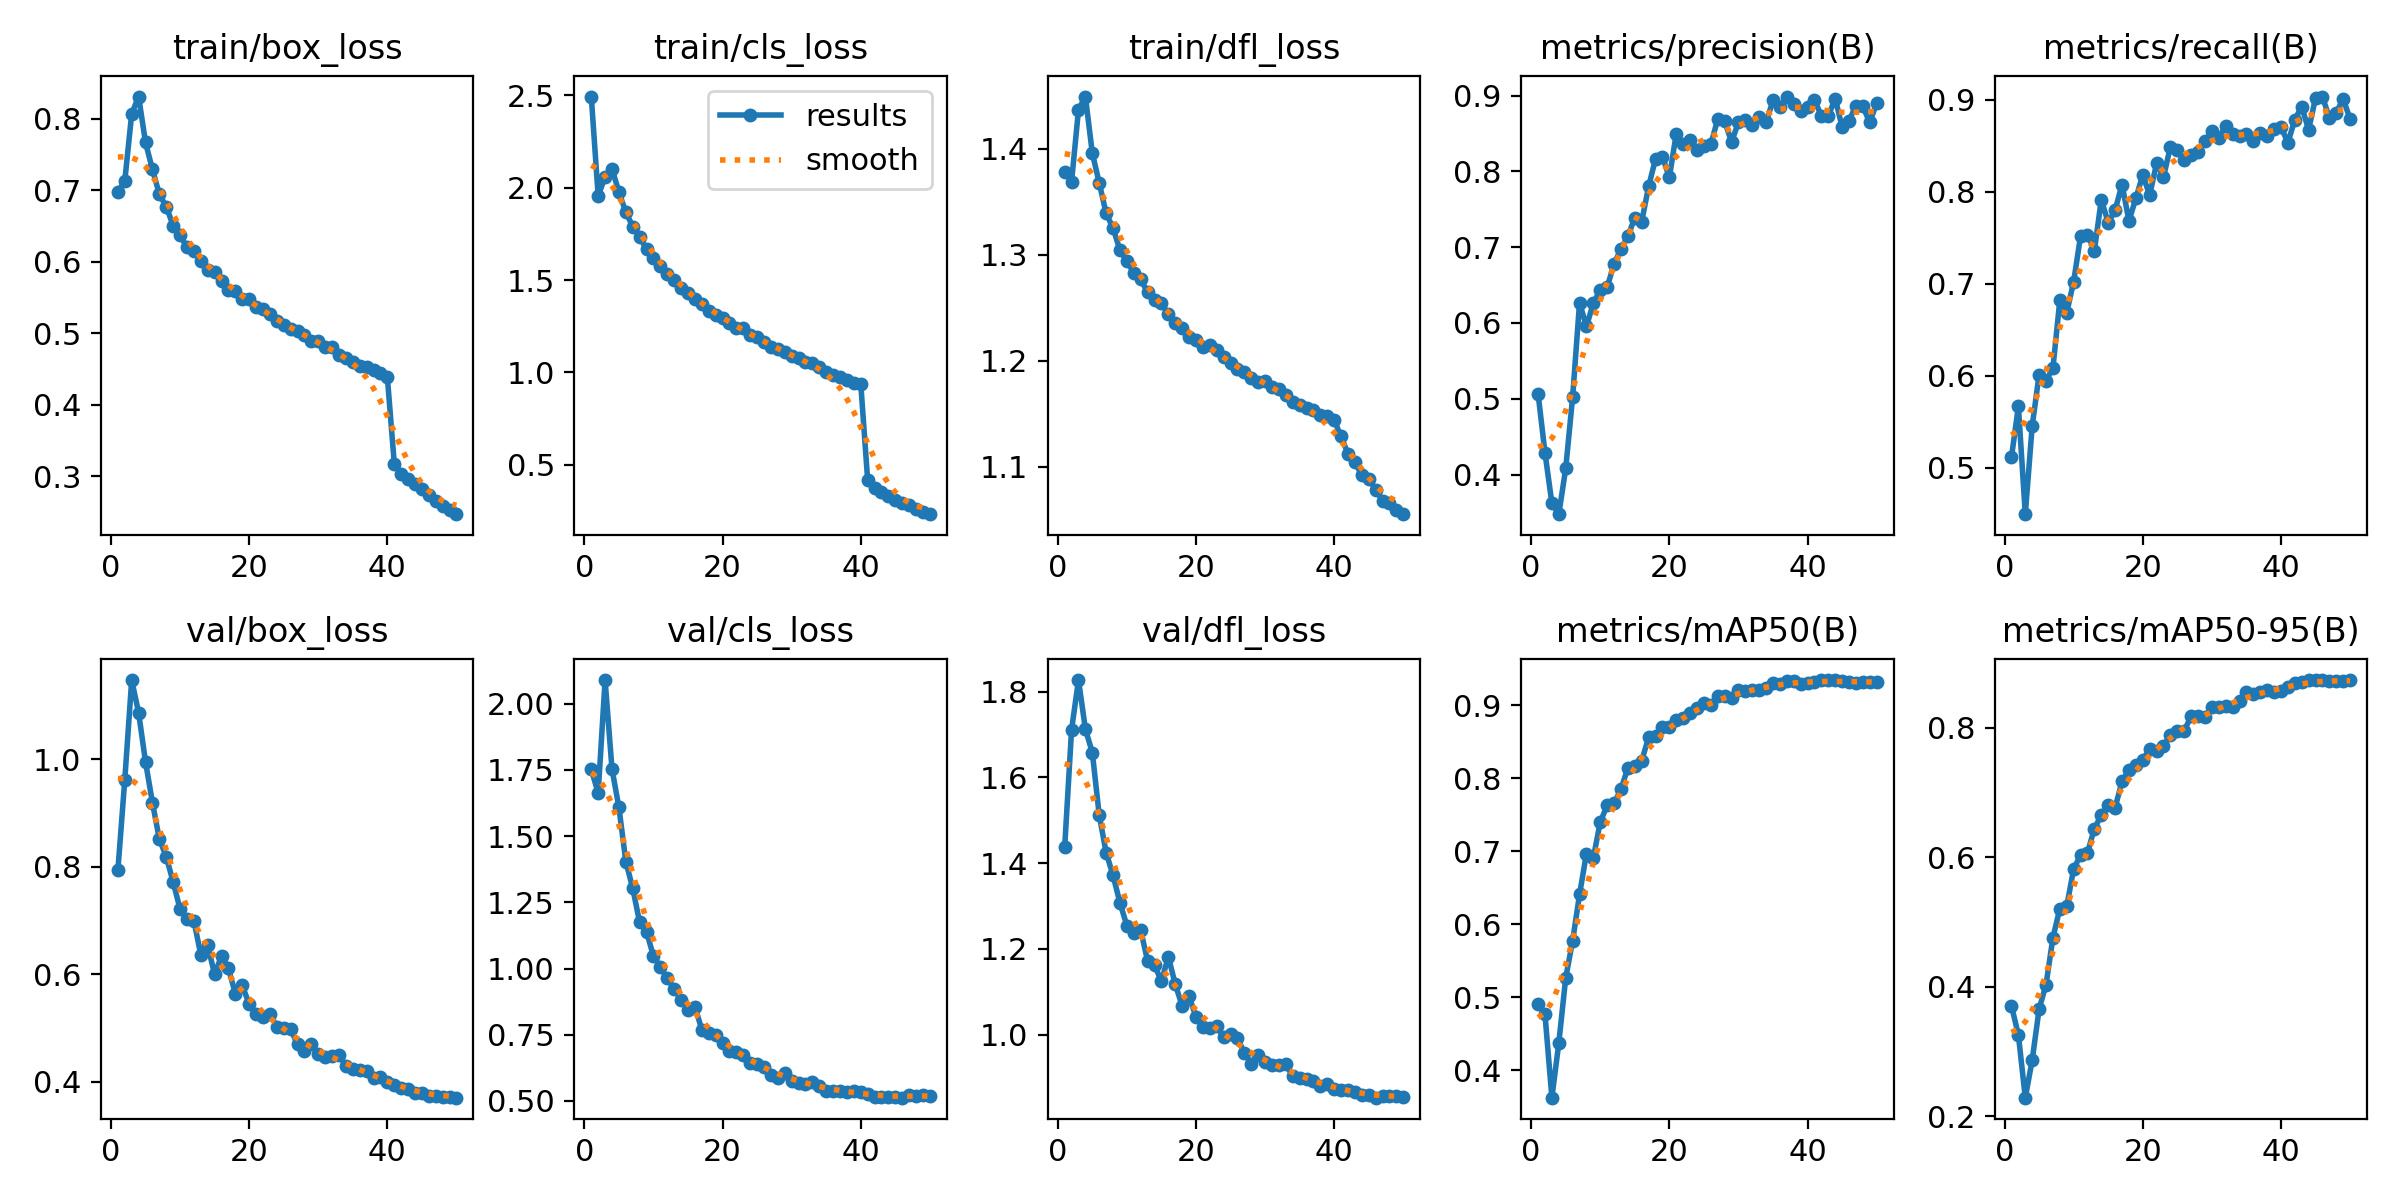

In [ ]:
# === 5. Отримання результатів навчання у вигляді графіків ===

# Загальні результати навчання
IPyImage (filename = f'/content/runs/detect/train_result/results.png', width =600)

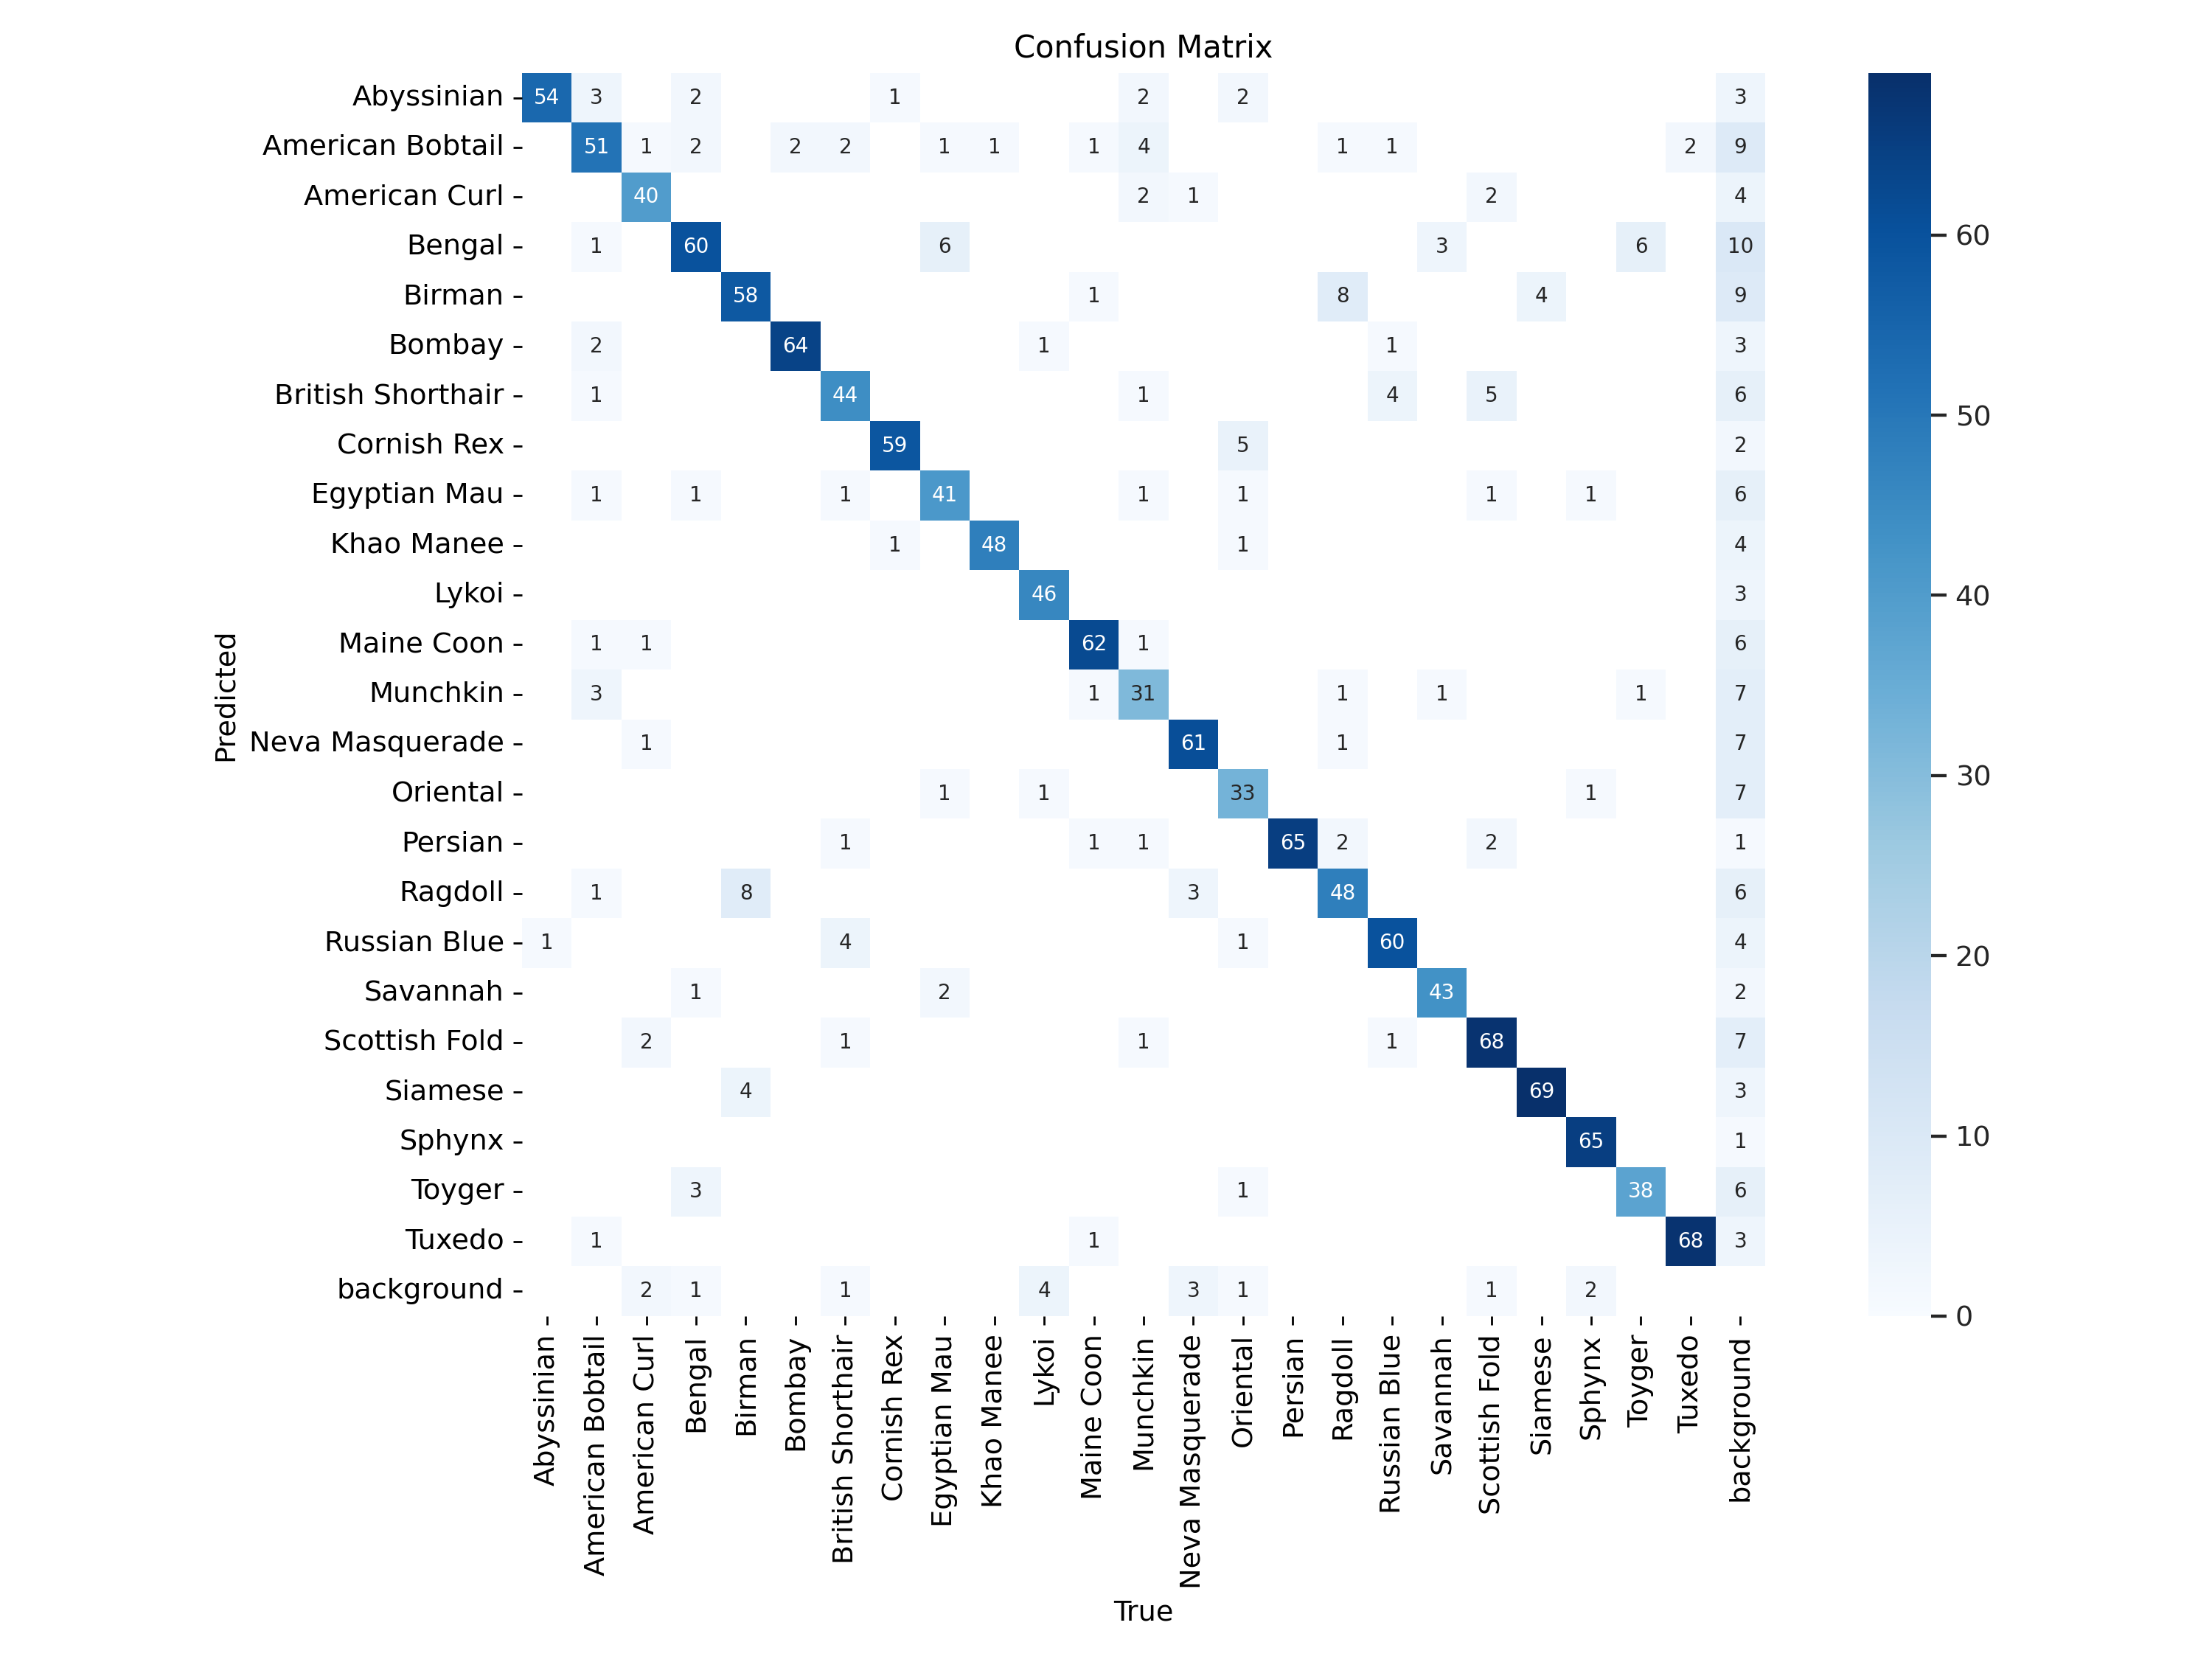

In [ ]:
# Матриця заплутаності (Confusion Matrix)
IPyImage (filename = f'/content/runs/detect/train_result/confusion_matrix.png', width =600)

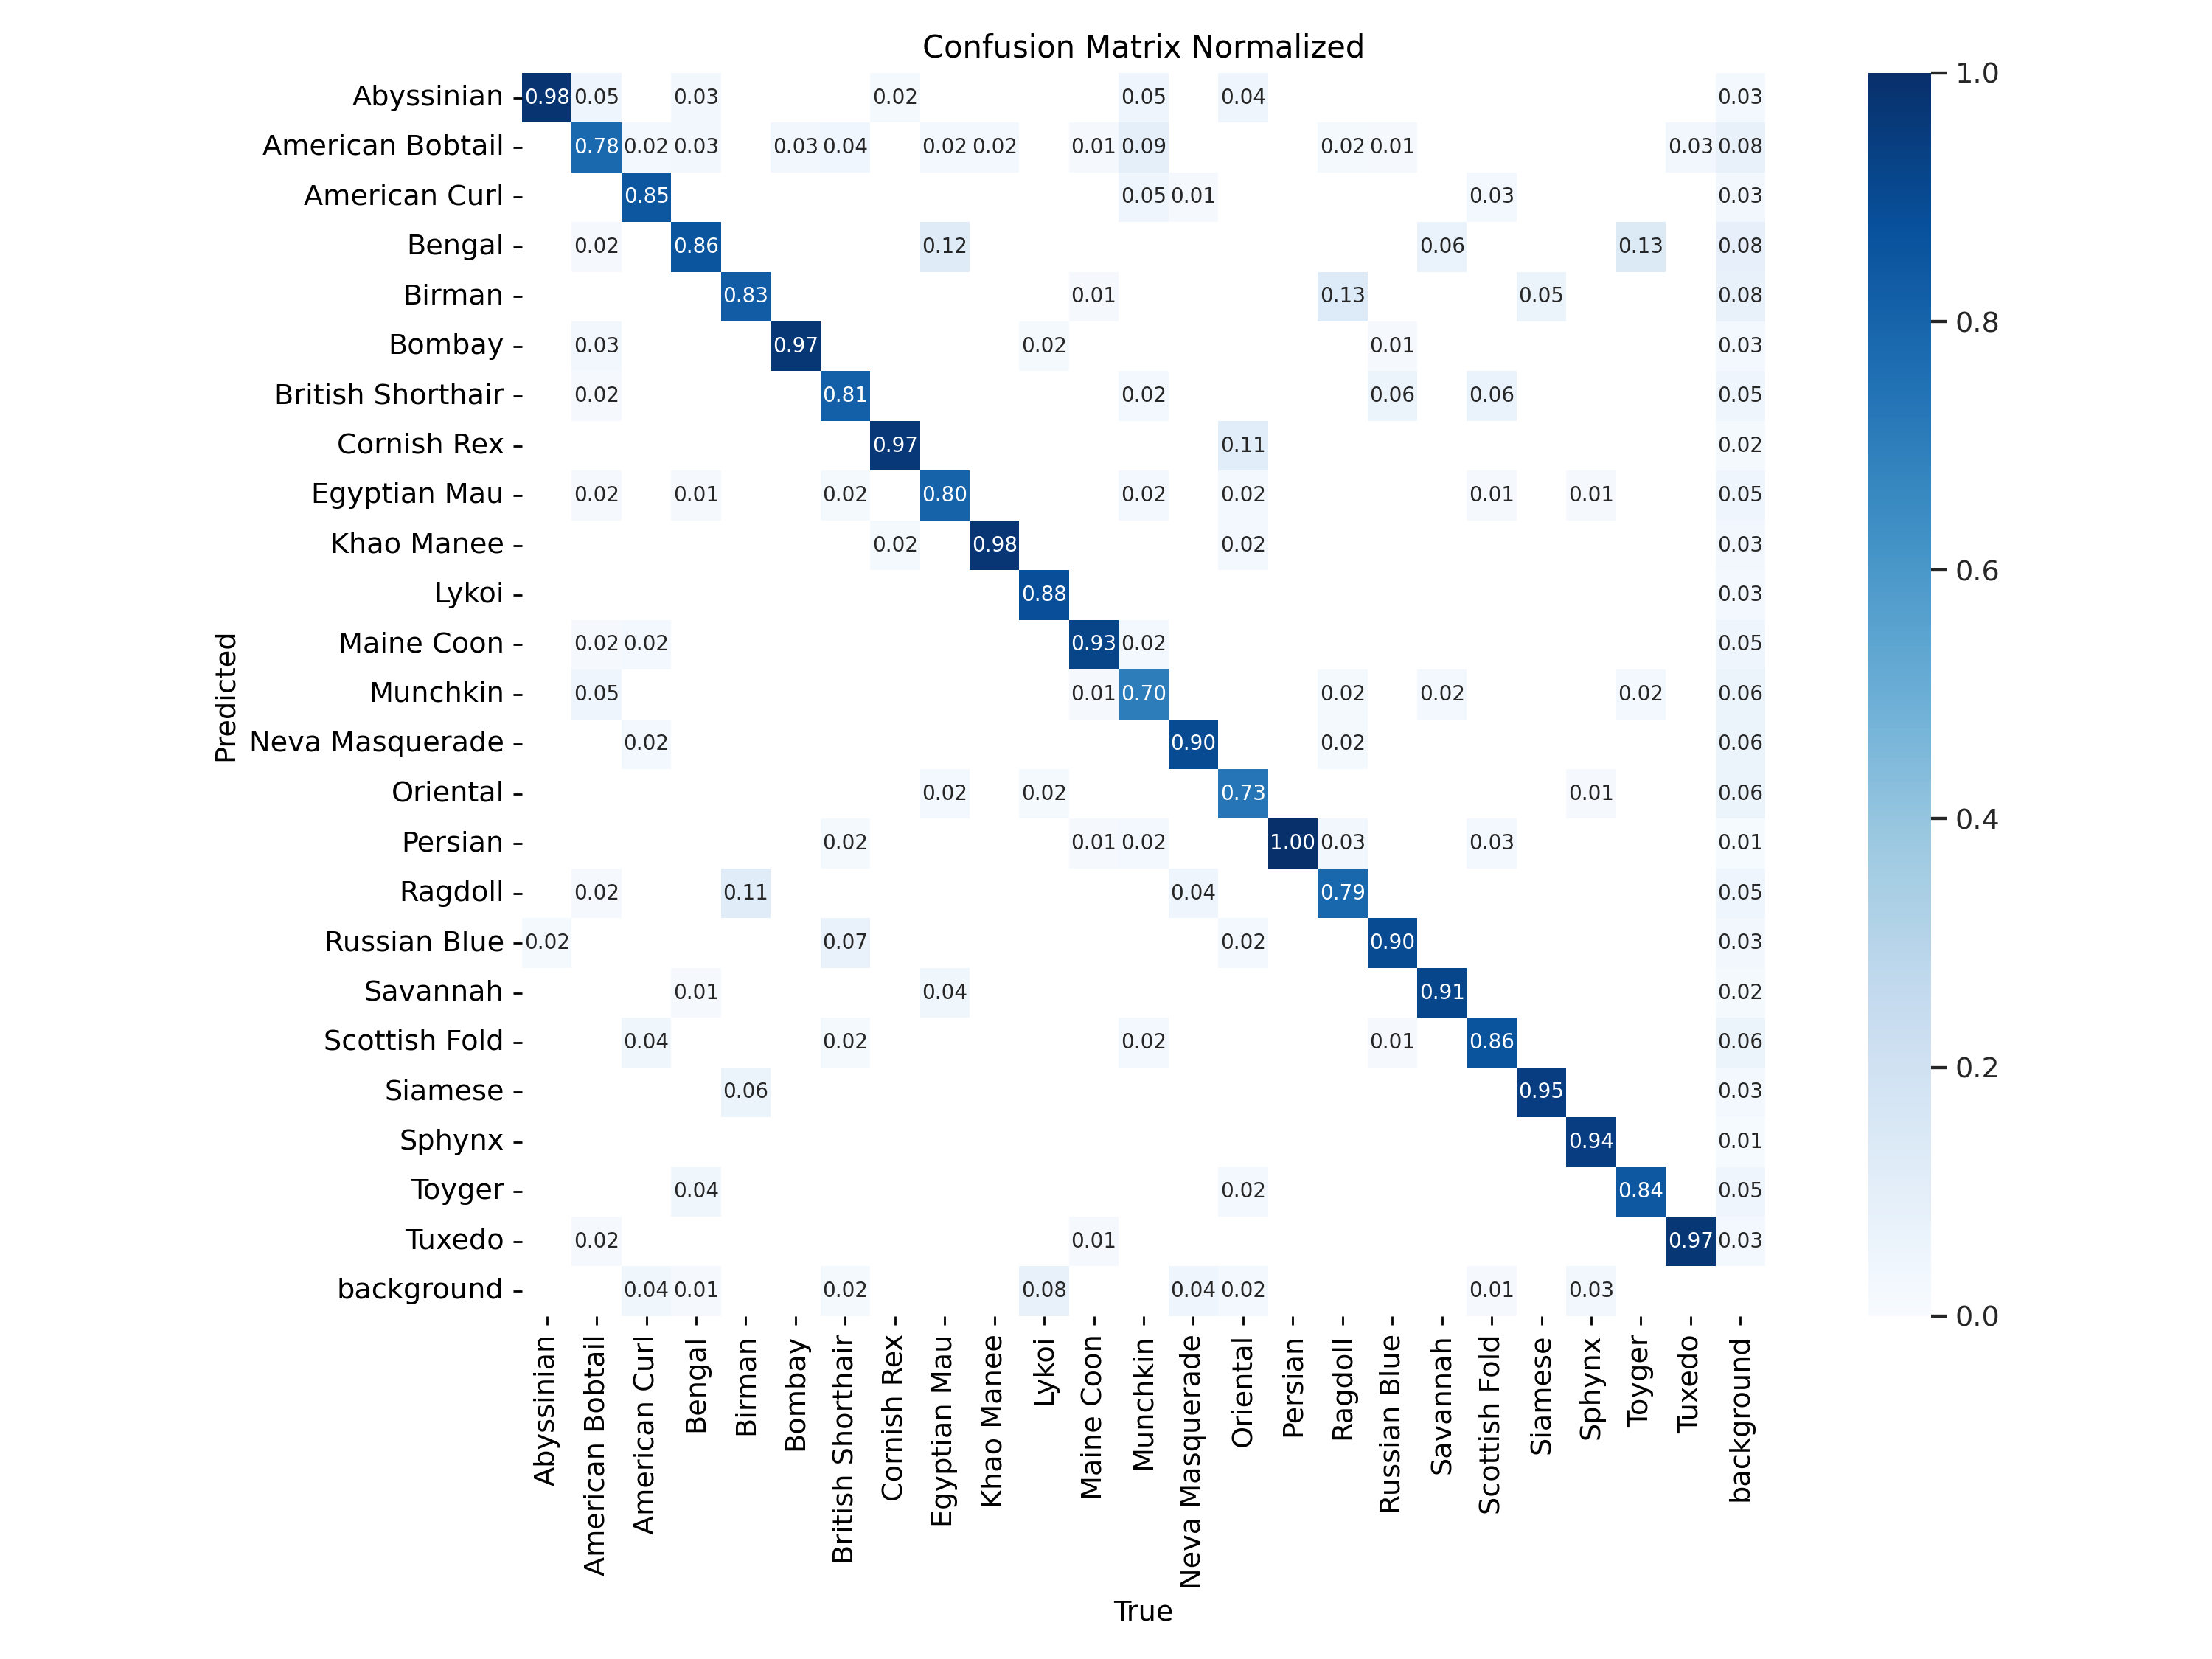

In [ ]:
# Нормалізована матриця заплутаності (Confusion Matrix Normalized)
IPyImage (filename = f'/content/runs/detect/train_result/confusion_matrix_normalized.png', width =600)

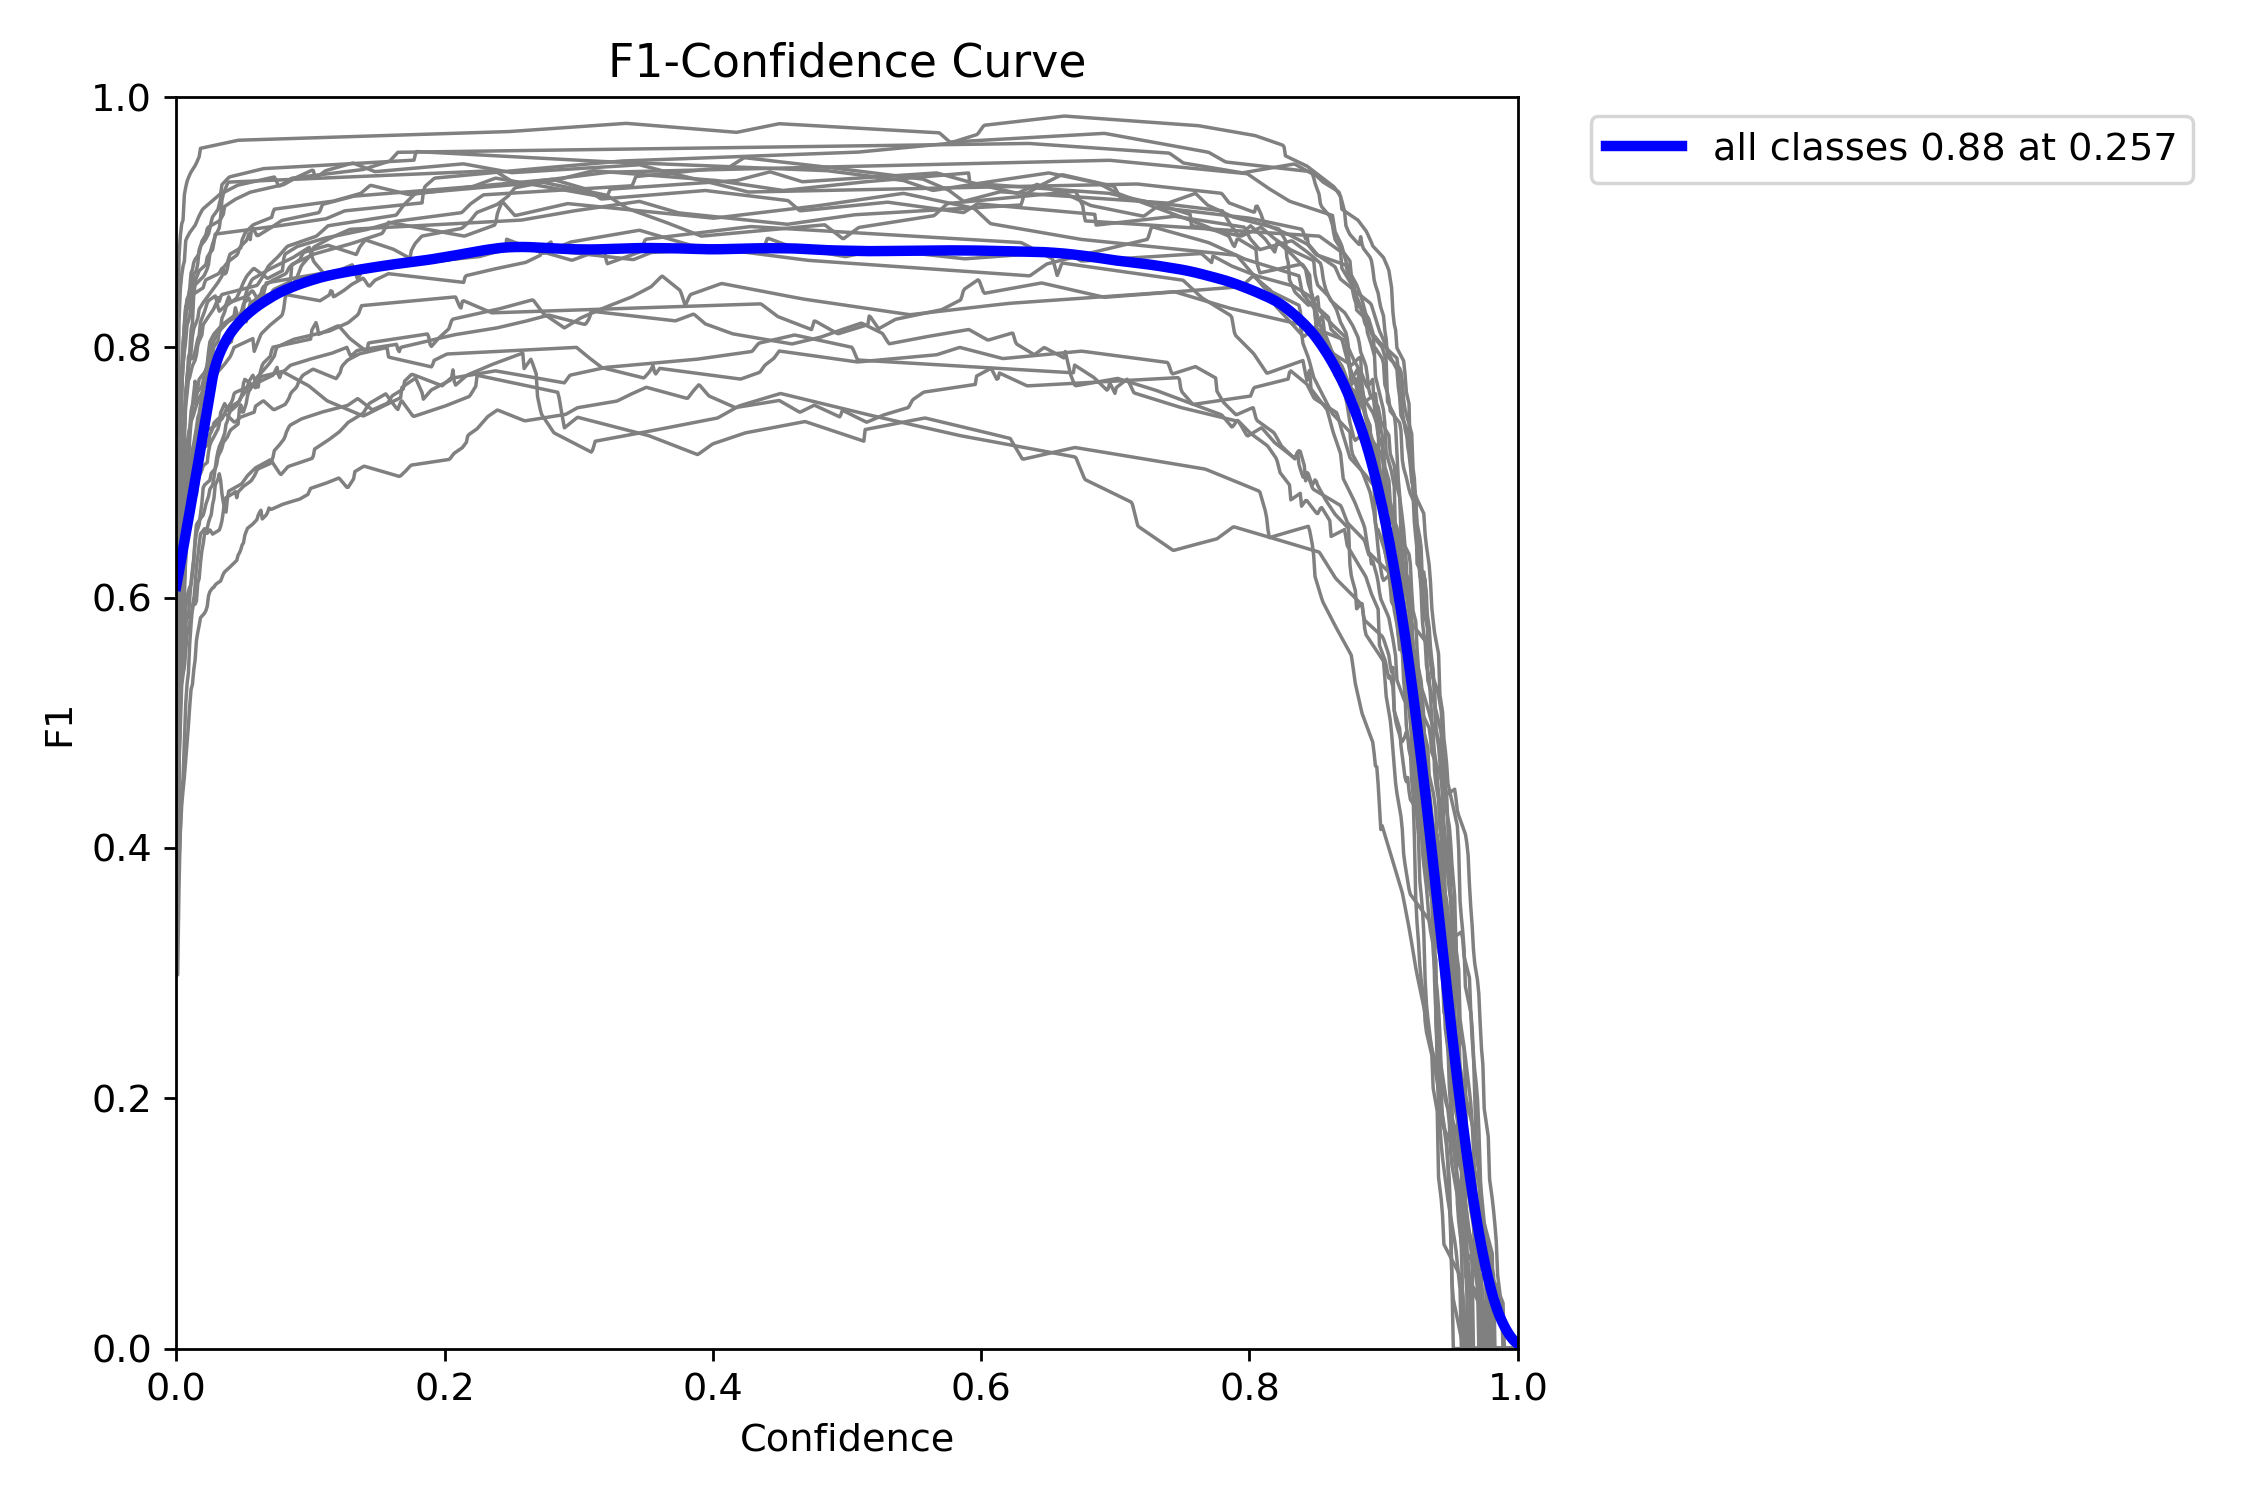

In [ ]:
# Графік залежності F1-score від рівня впевненості (F1-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/F1_curve.png', width =600)

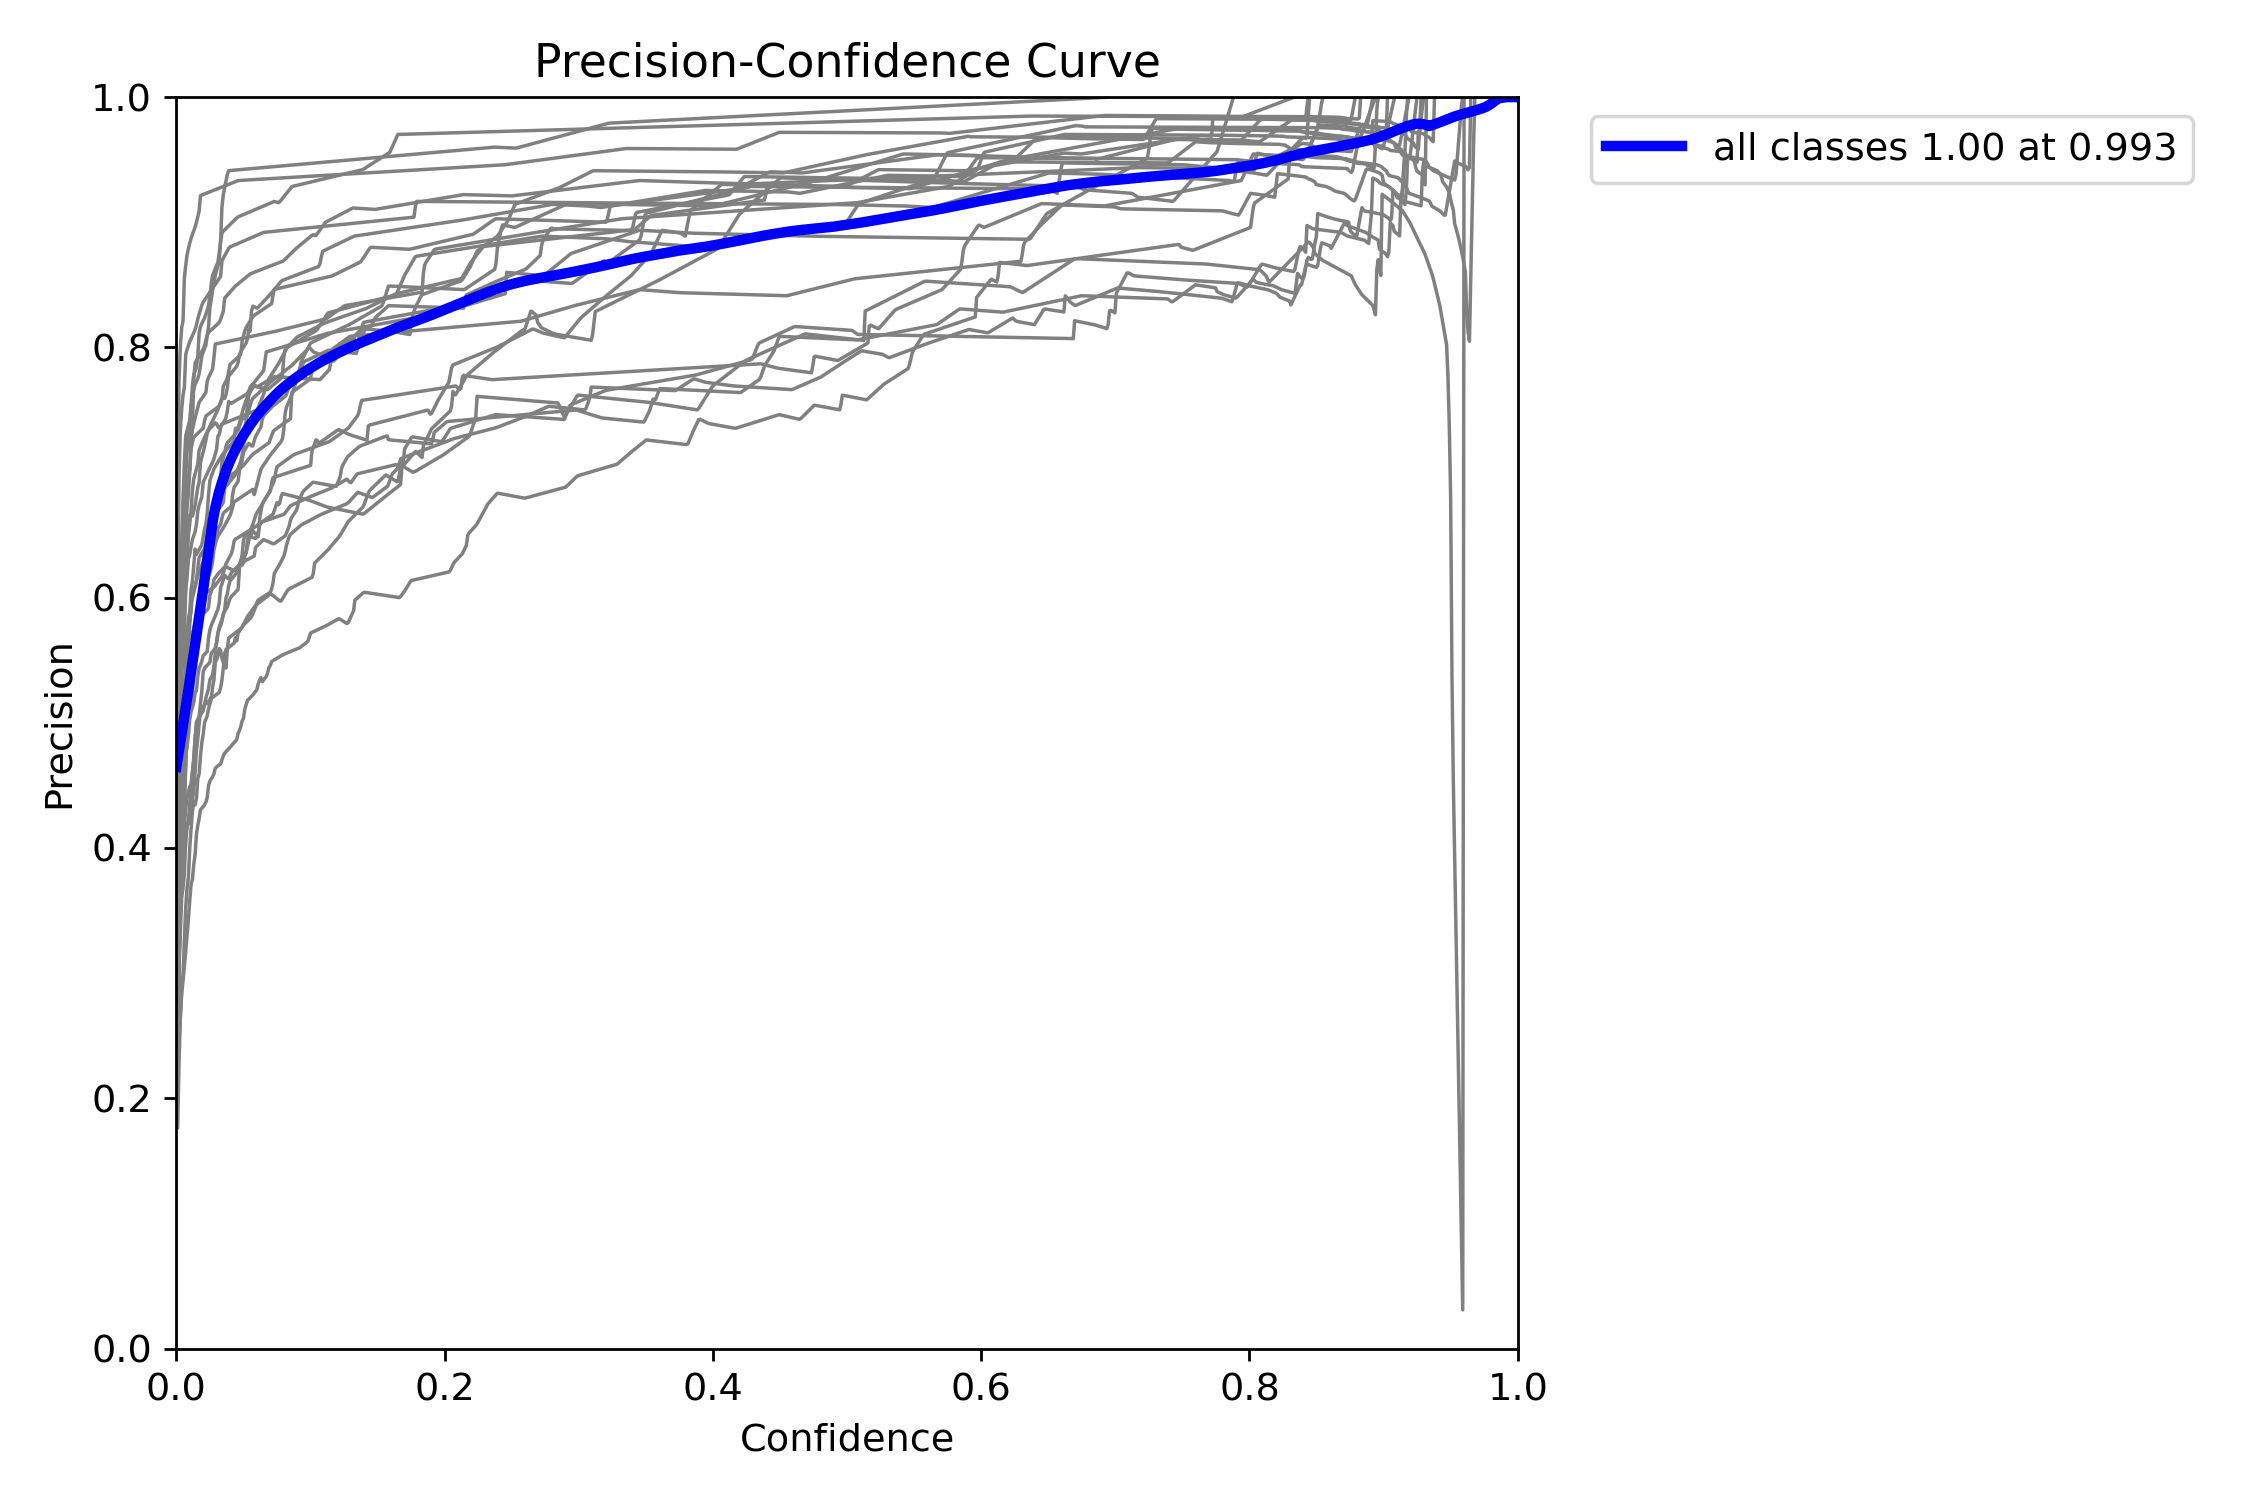

In [ ]:
# Графік залежності точності від впевненості *(Orecision-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/P_curve.png', width =600)

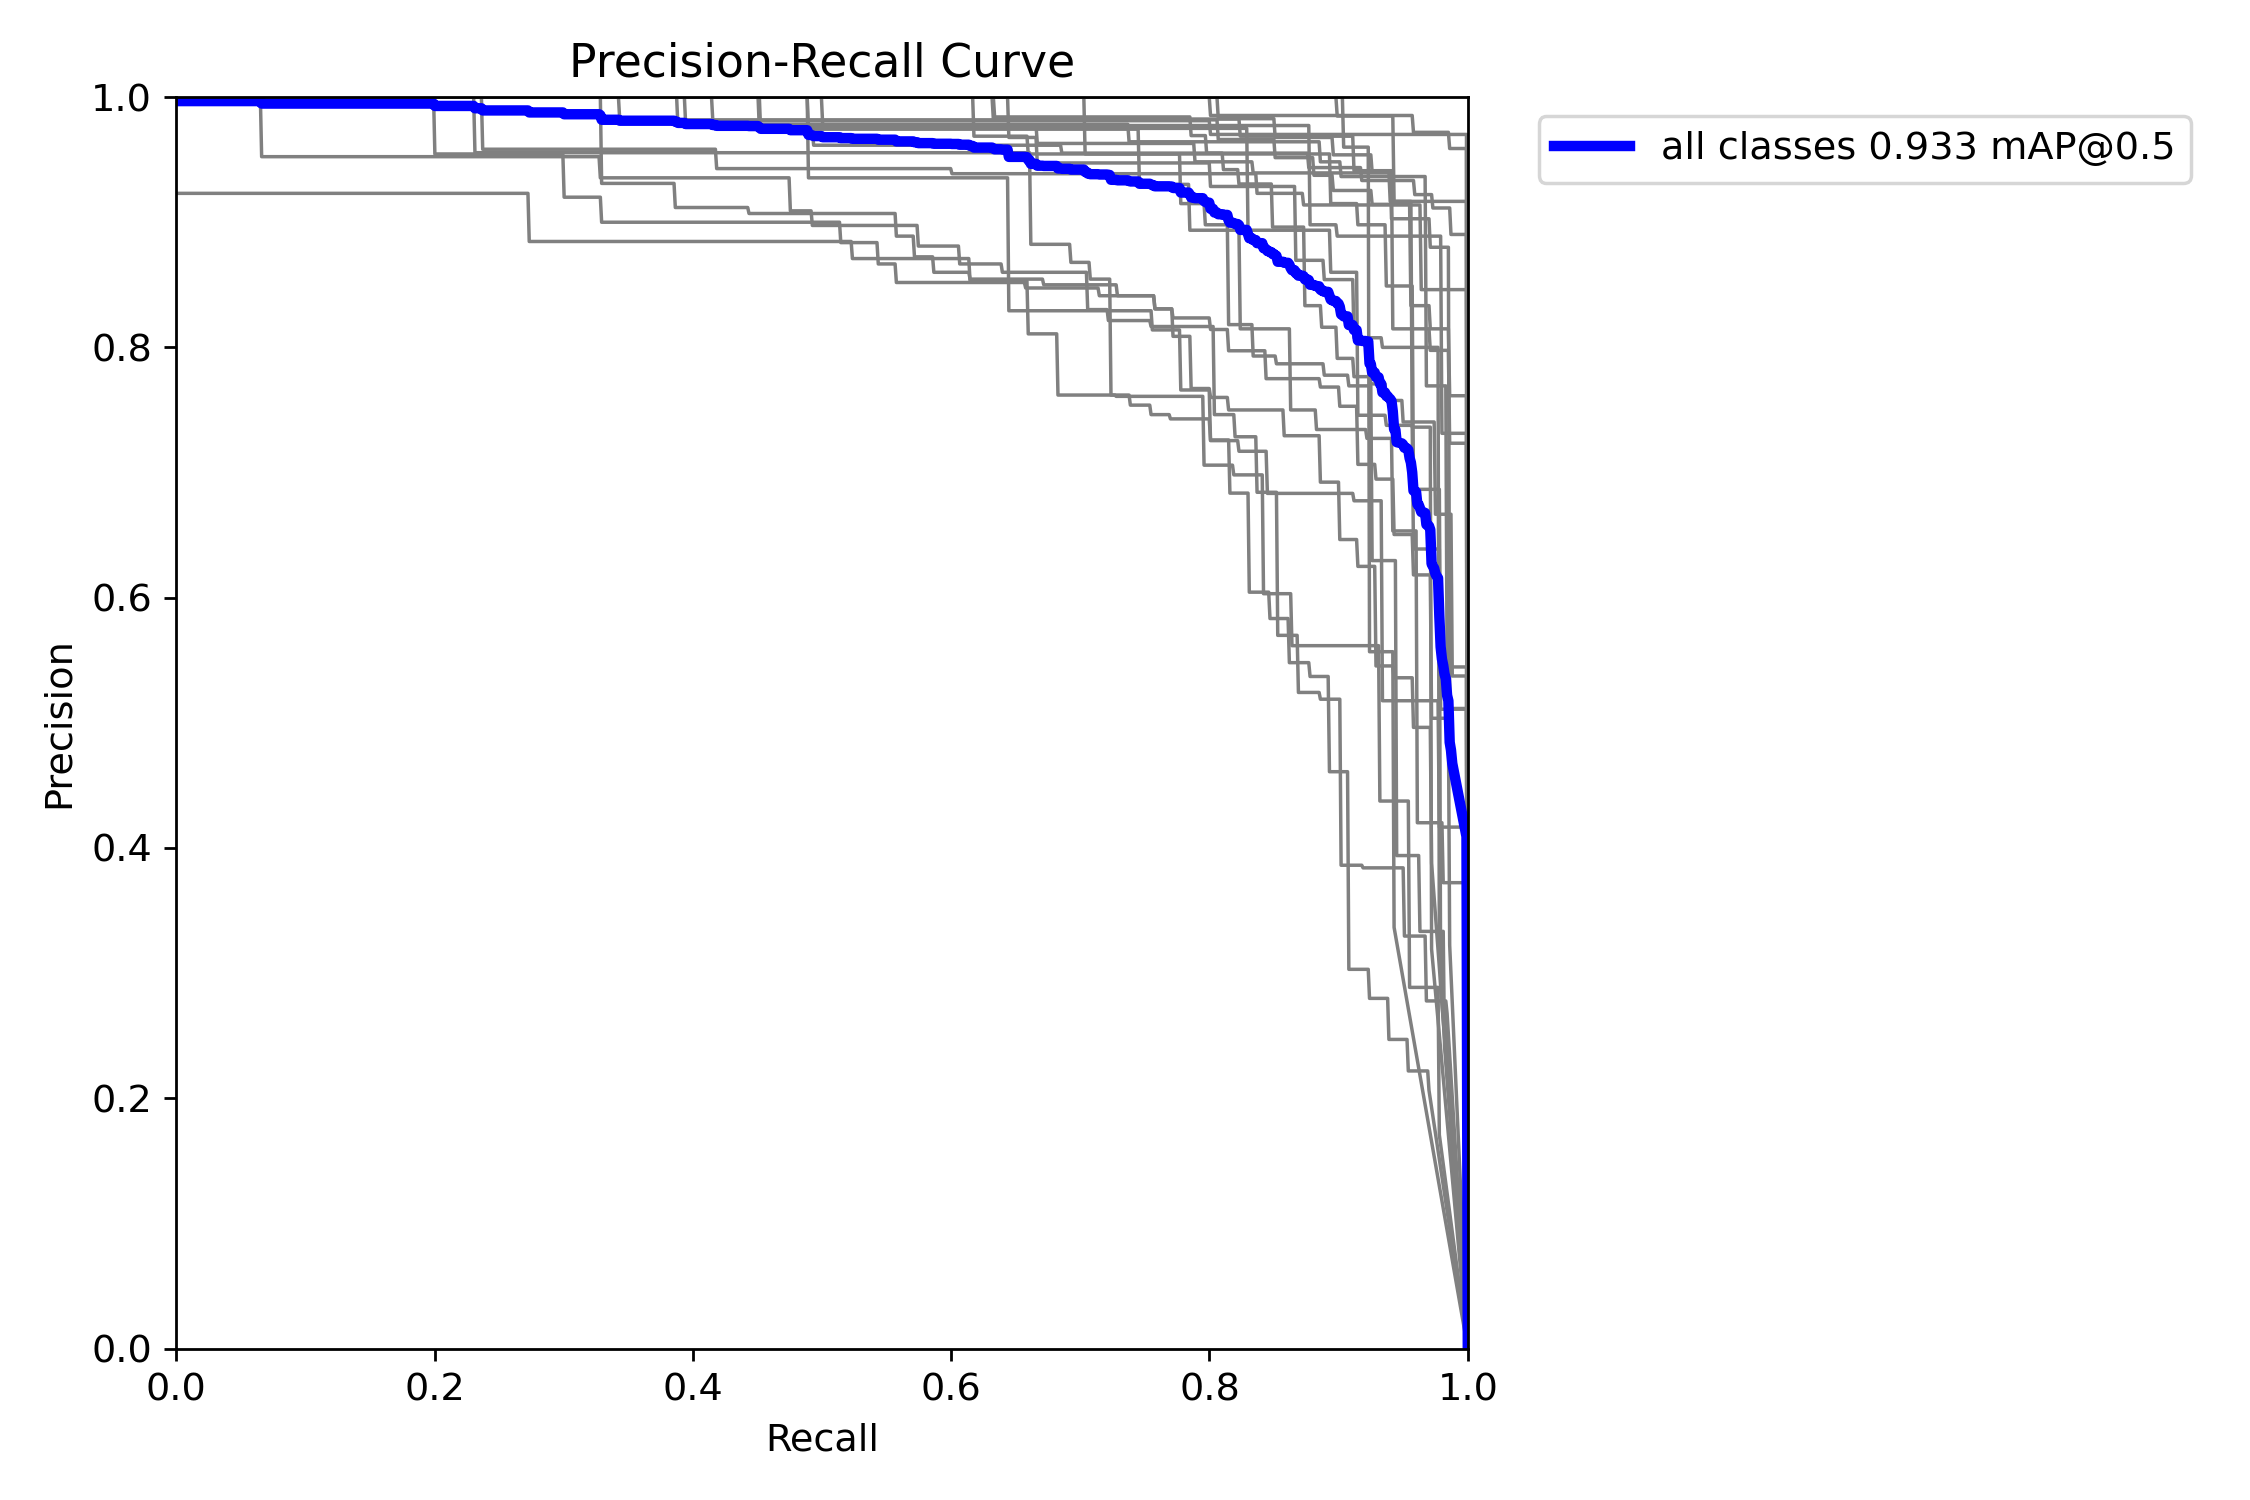

In [ ]:
# Графік залежності точності від повноти (Precision-Recall Curve)
IPyImage (filename = f'/content/runs/detect/train_result/PR_curve.png', width =600)

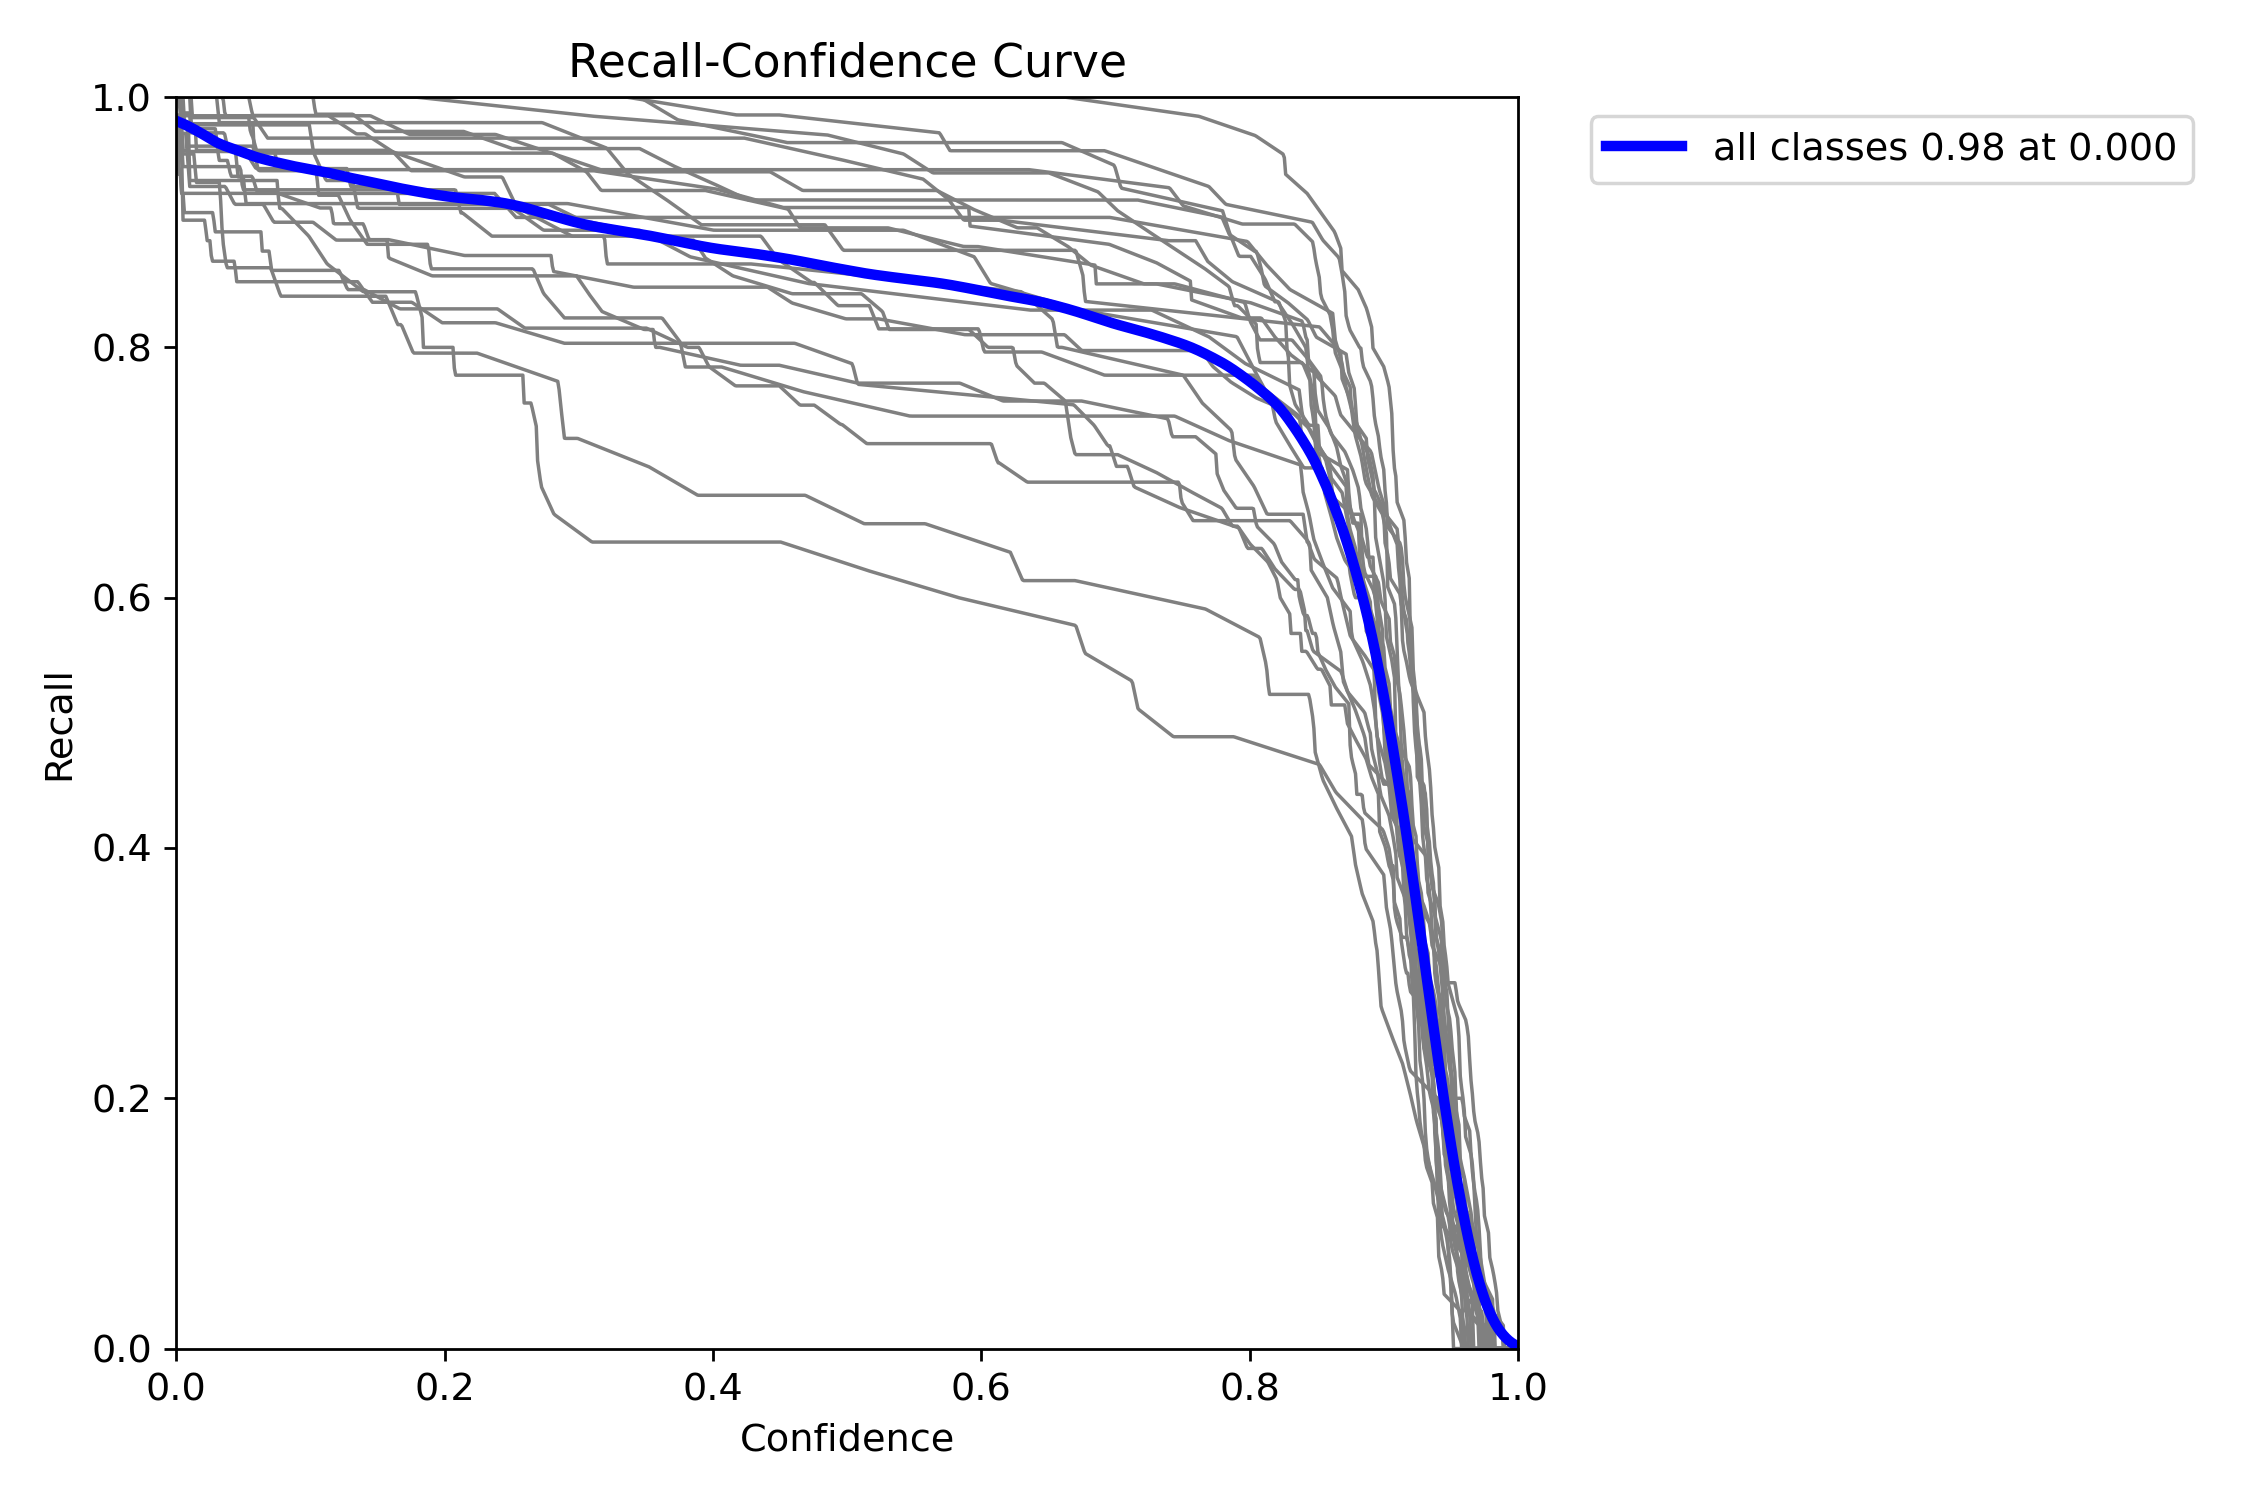

In [ ]:
# Графік залежності повноти від впевненості (Recall-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/R_curve.png', width =600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Вкажи шлях до вихідної папки
source_folder = "/content/runs"

# Вкажи шлях до папки на Google Drive
destination_folder = "/content/drive/MyDrive/ITVR_Coursework/yolo11m (50 epochs, 8 im batch)"

# Копіюємо папку, дозволяючи перезаписувати існуючі файли
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

print("Папку успішно скопійовано!")

Папку успішно скопійовано!


In [ ]:
import shutil
from google.colab import files

# Вкажи шлях до папки, яку потрібно завантажити
folder_path = "/content/runs"

# Стиснемо папку у формат ZIP
shutil.make_archive("yolo11m (50 epochs, 8 im batch)", "zip", folder_path)

# Завантажимо архів
files.download("yolo11m (50 epochs, 8 im batch).zip")